# **IMPORT LIBRARY**

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# **BACA DATASET**

In [2]:
# Membaca data dari file
file_path = 'data.csv'  
df = pd.read_csv(file_path)

In [3]:
df.head()

,PROVINSI / PROVINCE,SP1971,SP1980,SP1990,SP2000,SP2010,LF SP2020
0,ACEH,6.27,5.24,4.37,2.81,2.79,2.42
1,SUMATERA UTARA,7.20,5.94,4.29,3.10,3.01,2.48
2,SUMATERA BARAT,6.18,5.76,3.89,3.06,2.91,2.46
3,RIAU,5.94,5.44,4.09,2.77,2.82,2.28
4,JAMBI,6.39,5.57,3.76,2.67,2.51,2.28


In [4]:
df

,PROVINSI / PROVINCE,SP1971,SP1980,SP1990,SP2000,SP2010,LF SP2020
0,ACEH,6.27,5.24,4.37,2.81,2.79,2.42
1,SUMATERA UTARA,7.20,5.94,4.29,3.10,3.01,2.48
2,SUMATERA BARAT,6.18,5.76,3.89,3.06,2.91,2.46
3,RIAU,5.94,5.44,4.09,2.77,2.82,2.28
4,JAMBI,6.39,5.57,3.76,2.67,2.51,2.28
5,SUMATERA SELATAN,6.33,5.59,4.22,2.88,2.56,2.23
6,BENGKULU,6.72,6.20,3.97,2.68,2.51,2.30
7,LAMPUNG,6.36,5.75,4.05,2.65,2.45,2.28
8,KEPULAUAN BANGKA BELITUNG,-,-,-,2.60,2.54,2.24
9,KEPULAUAN RIAU,-,-,-,-,2.38,2.21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PROVINSI / PROVINCE  35 non-null     object 
 1   SP1971               35 non-null     object 
 2   SP1980               35 non-null     object 
 3   SP1990               35 non-null     object 
 4   SP2000               35 non-null     object 
 5   SP2010               35 non-null     object 
 6   LF SP2020            35 non-null     float64
dtypes: float64(1), object(6)
memory usage: 2.0+ KB


In [6]:
df.isnull().any()

PROVINSI / PROVINCE    False
SP1971                 False
SP1980                 False
SP1990                 False
SP2000                 False
SP2010                 False
LF SP2020              False
dtype: bool

In [7]:
print(df.dtypes)

PROVINSI / PROVINCE     object
SP1971                  object
SP1980                  object
SP1990                  object
SP2000                  object
SP2010                  object
LF SP2020              float64
dtype: object


# **PREPROCESSING DATA**

In [8]:
# Mengubah nama kolom sesuai dengan data yang benar
df.columns = ['Provinsi', 'SP1971', 'SP1980', 'SP1990', 'SP2000', 'SP2010', 'SP2020']

# Mengganti nilai '-' dengan NaN dan mengonversi kolom yang relevan menjadi numerik
df.replace('-', np.nan, inplace=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Menghapus baris yang mengandung NaN
df.dropna(inplace=True)

# Mengubah data ke format panjang
df_melted = df.melt(id_vars=['Provinsi'],
                    value_vars=['SP1971', 'SP1980', 'SP1990', 'SP2000', 'SP2010', 'SP2020'],
                    var_name='Year',
                    value_name='TFR')

# Mengubah tahun menjadi format datetime
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)
df_melted['Year'] = pd.to_datetime(df_melted['Year'], format='%Y')
df_melted = df_melted.rename(columns={'Year': 'ds', 'TFR': 'y'})

# Mengonversi kolom TFR ke tipe numerik
df_melted['y'] = df_melted['y'].astype(float)

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gulam\AppData\Local\Temp\ipykernel_14776\2354685370.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 34
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  27 non-null     object 
 1   SP1971    27 non-null     float64
 2   SP1980    27 non-null     float64
 3   SP1990    27 non-null     float64
 4   SP2000    27 non-null     float64
 5   SP2010    27 non-null     float64
 6   SP2020    27 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.7+ KB


In [10]:
df.isnull().any()

Provinsi    False
SP1971      False
SP1980      False
SP1990      False
SP2000      False
SP2010      False
SP2020      False
dtype: bool

In [11]:
print(df.dtypes)

Provinsi     object
SP1971      float64
SP1980      float64
SP1990      float64
SP2000      float64
SP2010      float64
SP2020      float64
dtype: object


In [12]:
print(df.isnull().sum())


Provinsi    0
SP1971      0
SP1980      0
SP1990      0
SP2000      0
SP2010      0
SP2020      0
dtype: int64


In [13]:
# Pilih hanya kolom yang numerik
df_numeric = df.select_dtypes(include=[np.number])

# Hitung korelasi pada kolom numerik saja
corr = df_numeric.corr()
corr.style.background_gradient(cmap='PuBu')

,SP1971,SP1980,SP1990,SP2000,SP2010,SP2020
SP1971,1.000000,0.822268,0.703434,0.737454,0.562964,0.648170
SP1980,0.822268,1.000000,0.881071,0.866963,0.696919,0.721364
SP1990,0.703434,0.881071,1.000000,0.949995,0.782841,0.873754
SP2000,0.737454,0.866963,0.949995,1.000000,0.893267,0.924785
SP2010,0.562964,0.696919,0.782841,0.893267,1.000000,0.881006
SP2020,0.648170,0.721364,0.873754,0.924785,0.881006,1.000000


# **ANALISIS MODEL PROPHET**

In [14]:
def analyze_province(province_name):
    # Filter data untuk provinsi yang dipilih
    province_data = df_melted[df_melted['Provinsi'] == province_name].copy()

    if province_data.empty:
        print(f"Data untuk provinsi '{province_name}' tidak ditemukan.")
        return None

    print("Data provinsi yang dianalisis:")
    print(province_data)

    # Melatih model menggunakan Prophet dengan yearly seasonality
    model = Prophet(growth='linear', yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    model.fit(province_data)

    # Membuat dataframe untuk prediksi
    future_dates = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future_dates)

    print("\nHasil prediksi:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

    # Mengambil prediksi untuk rentang 2030
    future_dates_2030 = pd.date_range(start='2030-01-01', end='2030-12-31', freq='D')
    future_2030 = pd.DataFrame({'ds': future_dates_2030})
    forecast_2030 = model.predict(future_2030)

    # Mengambil prediksi untuk tanggal 2030-01-30
    prediksi_2030 = forecast_2030[forecast_2030['ds'] == '2030-01-30']
    future_prediction = prediksi_2030['yhat'].values[0] if not prediksi_2030.empty else np.nan

    print(f"\nPrediksi untuk 2030-01-30: {future_prediction}")

    # Plot hasil prediksi
    fig, ax = plt.subplots()
    model.plot(forecast, ax=ax)
    plt.title(f'Analisis Prophet Angka Kelahiran di {province_name}')
    plt.xlabel('Tahun')
    plt.ylabel('Angka Kelahiran')

    # Menambahkan teks untuk setiap titik data
    for i in range(len(province_data)):
        ax.text(province_data['ds'].iloc[i], province_data['y'].iloc[i],
                f'{province_data["y"].iloc[i]:.2f}', fontsize=10, ha='right')

    # Menambahkan prediksi 2030 ke grafik
    if not np.isnan(future_prediction):
        ax.scatter(pd.Timestamp('2030-01-30'), future_prediction, color='green', s=100, label='Prediksi 2030')
        # Menggambarkan garis prediksi menuju tahun 2030
        last_year = pd.Timestamp(province_data['ds'].max())
        ax.plot([last_year, pd.Timestamp('2030-01-30')],
                [province_data['y'].iloc[-1], future_prediction],
                color='red', linestyle='--')

    ax.legend()

    # Menambahkan informasi metrik ke plot
    y_true = province_data['y'].values
    y_pred = forecast.loc[forecast['ds'].isin(province_data['ds']), 'yhat'].values

    if len(y_pred) > len(y_true):
        y_pred = y_pred[:len(y_true)]
    elif len(y_true) > len(y_pred):
        y_true = y_true[:len(y_pred)]

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Plot komponen
    fig2 = model.plot_components(forecast)

    # Cross Validation
    initial_period = '3650 days'  # 10 tahun data untuk pelatihan awal
    period = '365 days'  # Frekuensi prediksi tahunan
    horizon = '730 days'  # Jangka waktu prediksi 2 tahun

    df_cv = cross_validation(model, initial=initial_period, period=period, horizon=horizon)
    df_p = performance_metrics(df_cv)

    # Visualisasi Cross Validation
    fig3, ax3 = plt.subplots()
    ax3.plot(df_cv['ds'], df_cv['y'], 'k-', label='Actual')
    ax3.plot(df_cv['ds'], df_cv['yhat'], 'r-', label='Fitted')
    ax3.set_title('Hasil Cross Validation')
    ax3.set_xlabel('Tahun')
    ax3.set_ylabel('Angka Kelahiran')
    ax3.legend()

    return {
        'model': model,
        'forecast': forecast,
        'plot': fig,
        'components_plot': fig2,
        'cross_val_plot': fig3,
        'metrics': {
            'MSE': mse,
            'RMSE': rmse
        },
        'performance_metrics': df_p,
        'future_prediction_2030': future_prediction
    }

# **INPUT PROVINSI**

Data provinsi yang dianalisis:
        Provinsi         ds     y
8    DKI JAKARTA 1971-01-01  5.18
35   DKI JAKARTA 1980-01-01  3.99
62   DKI JAKARTA 1990-01-01  2.33
89   DKI JAKARTA 2000-01-01  1.63
116  DKI JAKARTA 2010-01-01  1.82
143  DKI JAKARTA 2020-01-01  1.75


18:15:27 - cmdstanpy - INFO - Chain [1] start processing
18:15:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\gulam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(



Hasil prediksi:
           ds      yhat  yhat_lower  yhat_upper
11 2025-12-31  0.621335   -0.184185    1.416875
12 2026-12-31  0.551274   -0.248781    1.279226
13 2027-12-31  0.481212   -0.305341    1.307819
14 2028-12-31  0.410959   -0.380794    1.189481
15 2029-12-31  0.340898   -0.390409    1.173839

Prediksi untuk 2030-01-30: 0.33513915630996266


c:\Users\gulam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\gulam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\gulam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

  0%|          | 0/4 [00:00<?, ?it/s]

18:15:28 - cmdstanpy - INFO - Chain [1] start processing
18:15:30 - cmdstanpy - INFO - Chain [1] done processing
18:15:31 - cmdstanpy - INFO - Chain [1] start processing
18:15:31 - cmdstanpy - INFO - Chain [1] done processing
18:15:31 - cmdstanpy - INFO - Chain [1] start processing
18:15:31 - cmdstanpy - INFO - Chain [1] done processing
18:15:31 - cmdstanpy - INFO - Chain [1] start processing
18:15:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\gulam\AppData\Local\Temp\ipykernel_14776\3522841646.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  result['plot'].show()
C:\Users\gulam\AppData\Local\Temp\ipykernel_14776\3522841646.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  result['components_plot'].show()
C:\Users\gulam\AppData\Local\Temp\ipykernel_14776\3522841646.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  result['cross_val_plot'].show()



Metrik kinerja untuk DKI JAKARTA:
MSE: 0.3915
RMSE: 0.6257

Metrik Kinerja Cross Validation:
   horizon       mse      rmse       mae      mape    mdape     smape  \
0 730 days  1.526753  1.235618  1.119411  0.628551  0.72458  1.045981   

   coverage  
0       0.0  

Prediksi angka kelahiran untuk tahun 2030: 0.3351


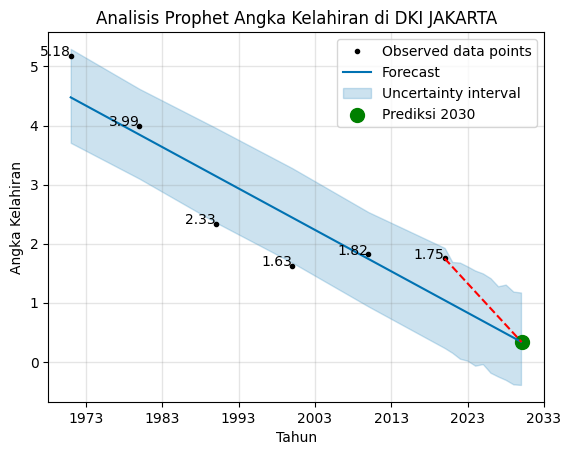

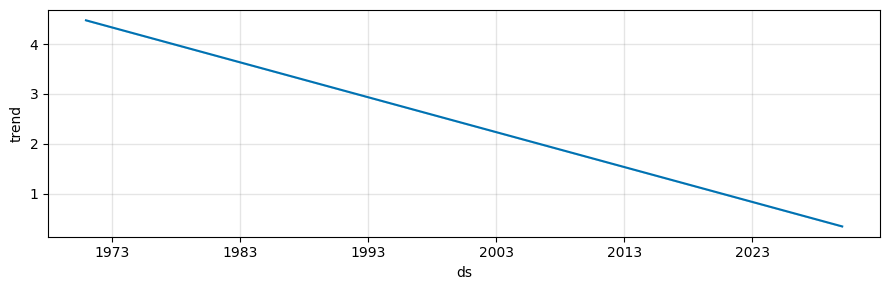

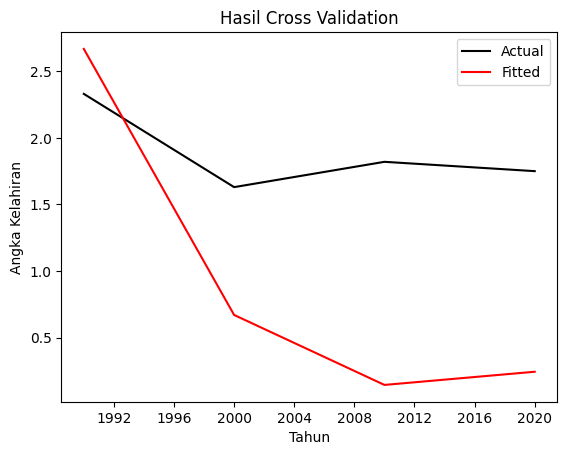

In [15]:
# Input provinsi untuk analisis
selected_province = 'DKI JAKARTA'  # Ganti dengan nama provinsi yang diinginkan

result = analyze_province(selected_province)

if result:
    result['plot'].show()
    result['components_plot'].show()
    result['cross_val_plot'].show()
    print(f"\nMetrik kinerja untuk {selected_province}:")
    for metric, value in result['metrics'].items():
        print(f"{metric}: {value:.4f}")

    print("\nMetrik Kinerja Cross Validation:")
    print(result['performance_metrics'])

    print(f"\nPrediksi angka kelahiran untuk tahun 2030: {result['future_prediction_2030']:.4f}")